# Landscape

All 3 terms

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, True, True
fix_u, fix_v = True, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c


In [ ]:
Ntime = 10
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)


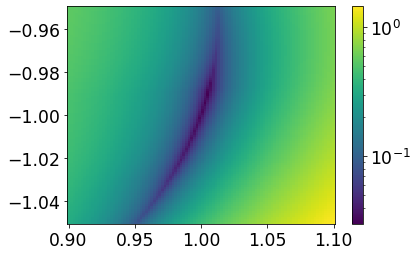

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $V$ and $t$

Targeted

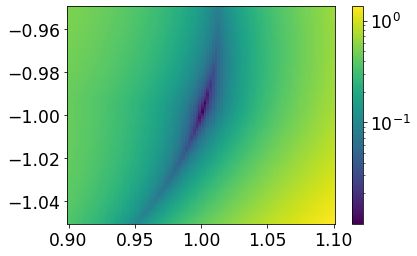

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, True
fix_u, fix_v = False, True

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Not targeted

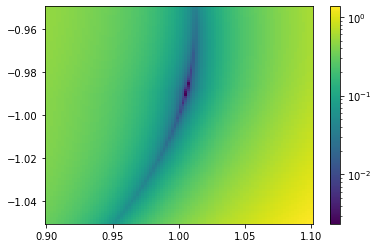

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, True
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$ and $t$

Not targeted

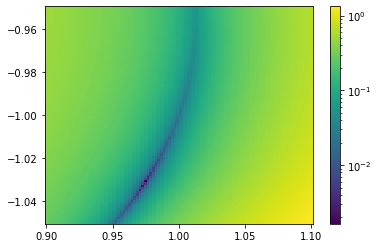

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, True, False
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$ and $V$

Not targeted

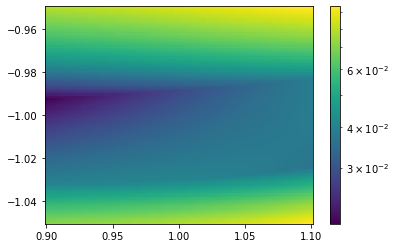

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, True
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $V$

Not targeted

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, True
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

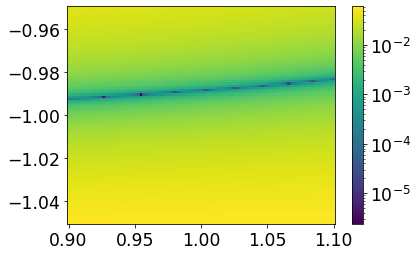

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Targeted

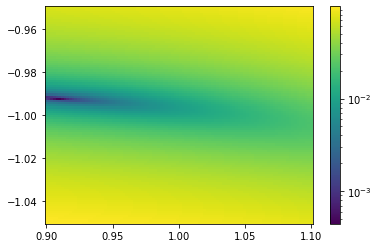

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, False, True
fix_u, fix_v = False, True

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $U$

Not targeted

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, False
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

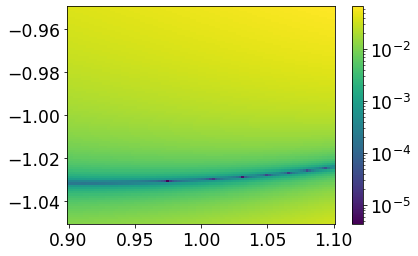

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Targeted

In [ ]:
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = True, False, False
fix_u, fix_v = True, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)

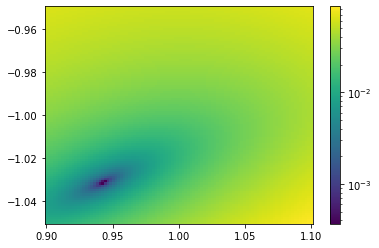

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()

Only $t$

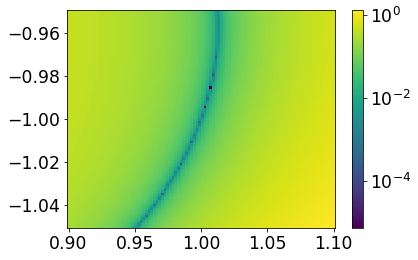

In [ ]:
from multiprocessing.dummy import Pool
from Hubbard.plot import *
import numpy as np

N = 20
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([3], dtype=int),
                 band=1,
                 dim=1,
                 avg=1 / 2,
                 sparse=True,
                 equalize=False,
                 symmetry=True,
                 verbosity=0)

u, t, v = False, True, False
fix_u, fix_v = False, False

res = G.singleband_Hubbard(u=u, output_unitary=True)
if u:
    A, U, V = res
else:
    A, V = res
    U = None

if fix_u:
    Utarget = np.mean(U)
else:
    Utarget = None
if t:
    nnt = G.nn_tunneling(A)
    xlinks, ylinks, nntx, nnty = G.xy_links(nnt)
else:
    nnt, xlinks, ylinks, nntx, nnty = None, None, None, None, None
if fix_v:
    Vtarget = np.mean(np.real(np.diag(A)))
else:
    Vtarget = None

v0, bounds = G.init_guess()
x0 = [V]


def cost_func(offset: np.ndarray, info: Union[dict, None]) -> float:
    c = G.cbd_cost_func(offset, info, (xlinks, ylinks),
                        (Vtarget, Utarget, nntx, nnty), (u, t, v), unitary=x0)

    return c

Ntime = 100
x = np.linspace(bounds[0][0], bounds[0][1], Ntime)
y = np.linspace(bounds[2][0], bounds[2][1], Ntime)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)
for i in range(len(x)):
    for j in range(len(y)):
        offset = np.array([x[i], 1, y[j], 0, 0, 0])
        Z[i, j] = cost_func(offset, None)
        
import matplotlib.pyplot as plt
import matplotlib.colors as colors

plt.pcolormesh(X, Y, Z, norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.colorbar()